# Experiments

Here are other (useful?) experiments to draw some statistics from these models. I believe all of these can be done even more efficiently. One idea that Dan has was: What about producing a lot of simulations using GPUs (JAX allowing that) and then train a normalizing flow to learn the posterior? This could be done for different kind of spot distributions too.

Anyway, let's start simple


In [1]:
import numpy as np
from spotter import Star, uniform
import matplotlib.pyplot as plt

star = Star(u=[0.1, 0.2], N=2**5)
amplitude = star.jax_amplitude(resolution=20)

draws = 100_000

In what follows, each exepriment is about 6 x 100 000 draws (i.e. amplitudes evaluations), each takes about 1:30 minutes on my laptop.

## Contrast

### Example

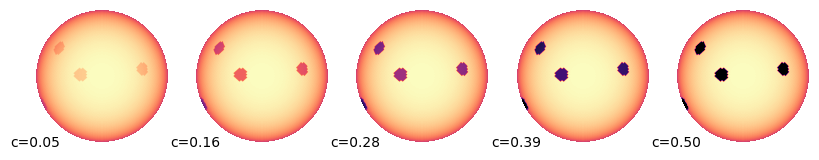

In [2]:
star.clear_surface()
np.random.seed(3)
theta, phi = uniform(5)
plt.figure(figsize=(10, 2))
for i, c in enumerate(np.linspace(0.05, 0.5, 5)):
    plt.subplot(1, 5, i + 1)
    star.clear_surface()
    star.add_spot(theta, phi, 0.1, c)
    star.show(vmin=0.5, vmax=1)
    plt.text(0.5, 0.5, f"c={c:.2f}", ha="center", va="center")

### Run

In [3]:
results = {}

for c in np.linspace(0.01, 1, 5):
    amplitudes = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(5)
        star.add_spot(theta, phi, 0.1, c)
        amplitudes.append(amplitude(star.map_spot))
    amplitudes = np.array(amplitudes)
    results[c] = amplitudes

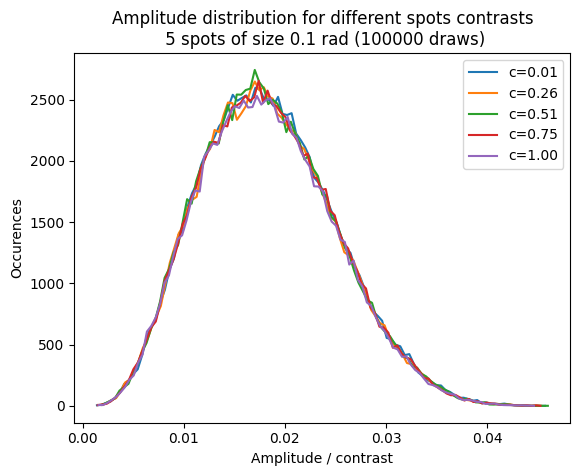

In [4]:
for c, amplitudes in results.items():
    x, bins = np.histogram(amplitudes, bins=100)
    plt.plot(bins[:-1] / c, x, label=f"c={c:.2f}")

plt.legend()
plt.xlabel("Amplitude / contrast")
plt.ylabel("Occurences")
_ = plt.title(
    f"Amplitude distribution for different spots contrasts\n 5 spots of size 0.1 rad ({draws} draws)"
)

## Number

### Example

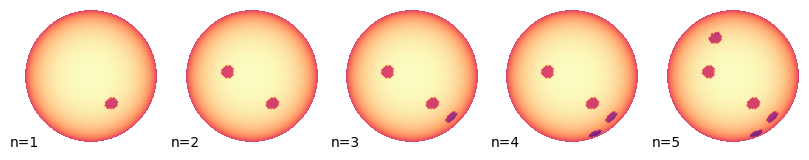

In [5]:
star.clear_surface()
plt.figure(figsize=(10, 2))
np.random.seed(17)
theta, phi = uniform(10)
for i, n in enumerate(range(1, 6)):
    plt.subplot(1, 5, i + 1)
    star.clear_surface()
    star.add_spot(theta[0:n], phi[0:n], 0.1, 0.2)
    star.show(vmin=0.5, vmax=1)
    plt.text(0.5, 0.5, f"n={n}", ha="center", va="center")

## Run

In [6]:
results = {}

for n in range(2, 8):
    amplitudes = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(n)
        star.add_spot(theta, phi, 0.1, 0.1)
        amplitudes.append(amplitude(star.map_spot))
    amplitudes = np.array(amplitudes)
    results[n] = amplitudes

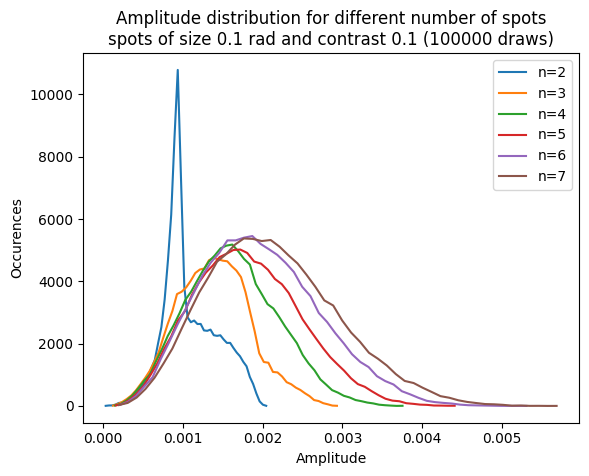

In [7]:
for n, amplitudes in results.items():
    x, bins = np.histogram(amplitudes, bins=50)
    plt.plot(bins[:-1], x, label=f"n={n}")

plt.legend()
plt.xlabel("Amplitude")
plt.ylabel("Occurences")
_ = plt.title(
    f"Amplitude distribution for different number of spots\nspots of size 0.1 rad and contrast 0.1 ({draws} draws)"
)

## Radius

### Example

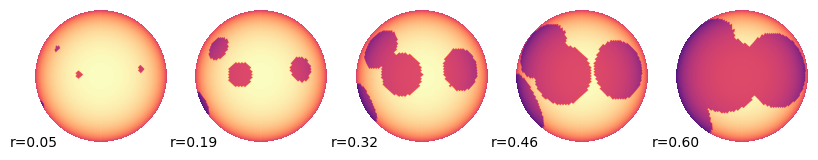

In [8]:
star.clear_surface()
np.random.seed(3)
theta, phi = uniform(5)
plt.figure(figsize=(10, 2))
for i, r in enumerate(np.linspace(0.05, 0.6, 5)):
    plt.subplot(1, 5, i + 1)
    star.clear_surface()
    star.add_spot(theta, phi, r, 0.2)
    star.show(vmin=0.5, vmax=1)
    plt.text(0.5, 0.5, f"r={r:.2f}", ha="center", va="center")

## Run

In [9]:
results = {}

for s in np.linspace(0.05, 0.6, 6):
    amplitudes = []
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(5)
        star.add_spot(theta, phi, s, 0.1)
        amplitudes.append(amplitude(star.map_spot))
    amplitudes = np.array(amplitudes)
    results[s] = amplitudes

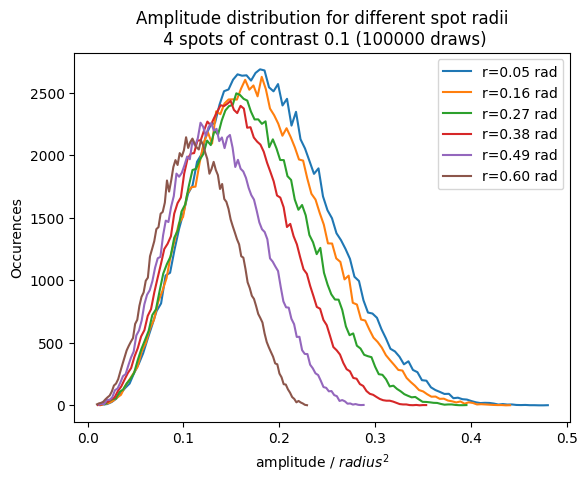

In [10]:
for r, amplitudes in results.items():
    x, bins = np.histogram(amplitudes, bins=100)
    plt.plot(bins[:-1] / r**2, x, label=f"r={r:.2f} rad")

plt.legend()
plt.xlabel("amplitude / $radius^2$")
plt.ylabel("Occurences")
_ = plt.title(
    f"Amplitude distribution for different spot radii\n 4 spots of contrast 0.1 ({draws} draws)"
)

## Limb darkening

### Example

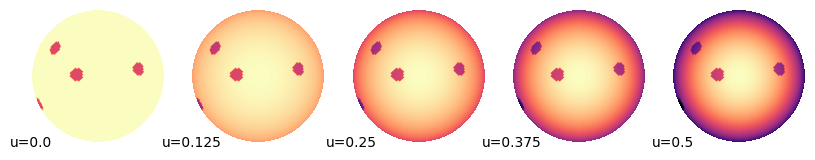

In [11]:
plt.figure(figsize=(10, 2))
np.random.seed(3)
theta, phi = uniform(5)
for i, u in enumerate(np.linspace(0.0, 0.5, 5)):
    plt.subplot(1, 5, i + 1)
    star = Star(u=[u], N=2**5)
    star.add_spot(theta, phi, 0.1, 0.2)
    star.show(vmin=0.5, vmax=1)
    plt.text(0.5, 0.5, f"u={u}", ha="center", va="center")

### Run

In [12]:
results = {}

np.random.seed(3)

for u in np.linspace(0.0, 0.5, 5):
    amplitudes = []
    star = Star(u=[u], N=2**5)
    amplitude = star.jax_amplitude(resolution=20)
    for i in range(draws):
        star.clear_surface()
        theta, phi = uniform(5)
        star.add_spot(theta, phi, 0.1, 0.2)
        amplitudes.append(amplitude(star.map_spot))
    amplitudes = np.array(amplitudes)
    results[u] = amplitudes

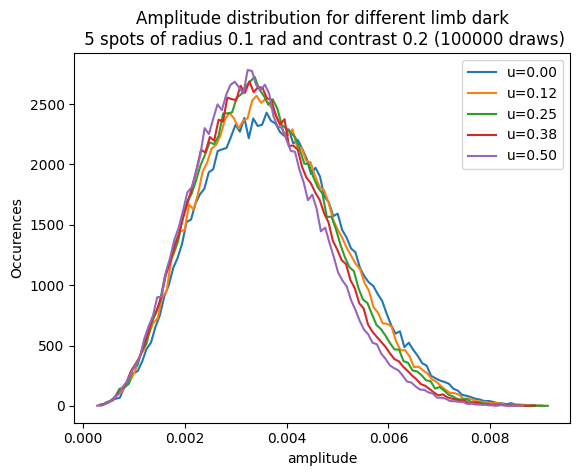

In [13]:
for u, amplitudes in results.items():
    x, bins = np.histogram(amplitudes, bins=100)
    plt.plot(bins[:-1], x, label=f"u={u:.2f}")

plt.legend()
plt.xlabel("amplitude")
plt.ylabel("Occurences")
_ = plt.title(
    f"Amplitude distribution for different limb dark\n 5 spots of radius 0.1 rad and contrast 0.2 ({draws} draws)"
)

Note the sampling issues on u = 0. due to the low resolution of the map.